In [1]:
import pandas as pd
import numpy as np
import statistics as stat
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
Dataset_OIL_GAS=pd.read_excel('Data_No_Conv_Arg.xlsx')

## Datos Producción Petróleo y Gas Argentina
Como ya se explico en las entregas anteriores trabajaremos con el historico de pozos no convencionales terminados en Argentina. Para entrar en contexto es importante mencionar que un pozo no convencional es un pozo en el cual se aplica fracturamiento para poder extraer el fluido (petróleo y/o gas). Este dataset contiene detalle segun el pozo, formación, tipo de reservorio, yacimiento, concesión y provincia, longitud de rama horizontal, cantidad de etapas de fractura, tipo de terminacion, toneladas de arena bombeada nacional e importada, agua inyectada, CO2 inyectado, presion maxima, potencia de equipos de fractura, fechas de inicio y fin de fractura y empresa informante.Las variables potencialmente interesantes serian ACUM_Pet y ACUM_Gas ya que a partir de las mismas podriamos predecir la rentabilidad de los pozos, lo que seria de gran ayuda en una mejor toma de deciones con respecto a la inversion asociada a los proyectos.
La rentabilidad de un pozo depende principalmente de 3 factores claves:  su costo, el precio de venta y el volumen de petróleo que acumula en su vida util. Segun los datos que tenemos disponibles, solo podriamos analizar el volumen de petróleo que acumula, en nuestro dataset representado por las variables ACUM_Pet, Pet_1A y Pet_2A. Por lo tanto la idea seria empezar a analizar cuales varibles de diseño de pozo y fractura tienen mayor influencia o correlacion con esta acumulada; con el proposito de escoger los parametros mas optimos para lograr o garantizar una mejor acumulada. 

In [3]:
Dataset_OIL_GAS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id_base_fractura_adjiv        3203 non-null   int64         
 1   idpozo                        3203 non-null   int64         
 2   sigla                         3203 non-null   object        
 3   cuenca                        3203 non-null   object        
 4   areapermisoconcesion          3203 non-null   object        
 5   yacimiento                    3203 non-null   object        
 6   formacion_productiva          3203 non-null   object        
 7   tipo_reservorio               3174 non-null   object        
 8   subtipo_reservorio            2341 non-null   object        
 9   longitud_rama_horizontal_m    3203 non-null   float64       
 10  cantidad_fracturas            3203 non-null   int64         
 11  tipo_terminacion              

In [4]:
Dataset_OIL_GAS

,id_base_fractura_adjiv,idpozo,sigla,cuenca,areapermisoconcesion,yacimiento,formacion_productiva,tipo_reservorio,subtipo_reservorio,longitud_rama_horizontal_m,...,Pet_1A,Gas_1A,Pet_2A,Gas_2A,ACUM_Pet,ACUM_Gas,TipoPozo,TipoExtraccion,LRH_BINS,Diseno_Pozo
0,1275,132612,CA.Nq.ET-926,NEUQUINA,EL TRAPIAL ESTE,EL TRAPIAL,huitrín,CONVENCIONAL,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Verical_o_Dirigido
1,1912,160767,TPT.Ch.S-2701,GOLFO SAN JORGE,EL TORDILLO,EL TORDILLO,mina el carmen,CONVENCIONAL,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Verical_o_Dirigido
2,1918,160981,TPT.Ch.S-2728,GOLFO SAN JORGE,EL TORDILLO,EL TORDILLO,mina el carmen,CONVENCIONAL,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Verical_o_Dirigido
3,1919,160952,TPT.Ch.S-2749,GOLFO SAN JORGE,EL TORDILLO,EL TORDILLO,mina el carmen,CONVENCIONAL,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Verical_o_Dirigido
4,1921,7023,TPT.Ch.S-2203,GOLFO SAN JORGE,EL TORDILLO,EL TORDILLO,comodoro rivadavia,CONVENCIONAL,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Verical_o_Dirigido
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,3588,162946,YPF.Nq.LLL-1613(h),NEUQUINA,LOMA CAMPANA,LOMA CAMPANA-LLL,vaca muerta,NO CONVENCIONAL,SHALE,3888.0,...,NaN,NaN,NaN,NaN,69327.13,6237.95,Petrolífero,Surgencia Natural,3500,Horizontal
3199,3589,162943,YPF.Nq.LLL-1610(h),NEUQUINA,LOMA CAMPANA,LOMA CAMPANA-LLL,vaca muerta,NO CONVENCIONAL,SHALE,4145.0,...,NaN,NaN,NaN,NaN,86286.93,7881.09,Petrolífero,Surgencia Natural,4000,Horizontal
3200,3828,163691,YPF.Nq.LLL-1674(h),NEUQUINA,LOMA CAMPANA,LOMA CAMPANA-LLL,vaca muerta,NO CONVENCIONAL,SHALE,4217.0,...,NaN,NaN,NaN,NaN,4809.08,650.47,Petrolífero,Surgencia Natural,4000,Horizontal
3201,3830,163693,YPF.Nq.LLL-1676(h),NEUQUINA,LOMA CAMPANA,LOMA CAMPANA-LLL,vaca muerta,NO CONVENCIONAL,SHALE,4224.0,...,NaN,NaN,NaN,NaN,6722.99,936.53,Petrolífero,Surgencia Natural,4000,Horizontal


A partir de los graficos que realizamos en la segunda entrega observamos que existen datos de algunas variables que debemos eliminar de nuestro dataset antes de comenzar a hacer calculos. Uno de estas es "tipo_reservorio", en la misma eliminaremos todos los datos correspondientes a los yacimientos tipo convencionales. 

In [5]:
DS_OG=Dataset_OIL_GAS

In [6]:
DS_OG.rename(columns={'longitud_rama_horizontal_m':'LRH'},inplace=True)

In [7]:
DS_OG.drop(DS_OG[DS_OG['tipo_reservorio']!= "NO CONVENCIONAL"].index, inplace=True)

Podemos observar que hemos reducido el numero de registros (3203 a 2344). Ahora vamos a eliminar los registros donde la acumulada de petroleo sea nula o igual a cero ya que estos corresponden a pozos de gas o que no tienen historia de producción y no aportan mayor información a nuestro analisis que en esta primera instancia nos centraremos a analizar los pozos de petróleo.

In [8]:
DS_OG.drop(DS_OG[DS_OG['TipoPozo']!= "Petrolífero"].index, inplace=True)

In [9]:
DS_OG.shape

(1206, 41)

In [10]:
DS_OG.drop(DS_OG[DS_OG['Diseno_Pozo']!= "Horizontal"].index, inplace=True)

In [11]:
DS_OG.shape

(745, 41)

Ya hemos hecho la limpieza de todos los datos para quedarnos solo con los registros correspondientes a pozos no convencionales, productores de petróleo y que sean horizontales. Como existen pozos que tienen historia de produccion menor a un año, es decir que en la variable Pet_1A y Pet_2A mostrara un vacio (NaN), por lo tanto lo vamos a reemplazar por cero.

In [12]:
DS_OG.fillna(0.0,inplace=True)
DS_OG.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 745 entries, 1377 to 3202
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id_base_fractura_adjiv        745 non-null    int64         
 1   idpozo                        745 non-null    int64         
 2   sigla                         745 non-null    object        
 3   cuenca                        745 non-null    object        
 4   areapermisoconcesion          745 non-null    object        
 5   yacimiento                    745 non-null    object        
 6   formacion_productiva          745 non-null    object        
 7   tipo_reservorio               745 non-null    object        
 8   subtipo_reservorio            745 non-null    object        
 9   LRH                           745 non-null    float64       
 10  cantidad_fracturas            745 non-null    int64         
 11  tipo_terminacion            

Por último eliminaremos los registros correspondientes a pozos en los que su longitud de rama horizontal no ha sido informada.

In [13]:
DS_OG.drop(DS_OG[DS_OG['LRH']<=0].index, inplace=True)
DS_OG.shape

(744, 41)

Ahora procedemos a crear unas nuevas variables de uso comun en la industria para facilitar el analisis de la correlación con la acumulada de petróleo. Estas seran: longitud_etapa, intensidad_fluido e intensidad_arena.

In [14]:
DS_OG['longitud_etapa'] = DS_OG['LRH']/DS_OG['cantidad_fracturas']
DS_OG['intensidad_fluido'] =((DS_OG['agua_inyectada_m3']*6.29)/DS_OG['cantidad_fracturas'])/(DS_OG['longitud_etapa']*3.2808)
DS_OG['intensidad_arena'] =(((DS_OG['arena_bombeada_nacional_tn']+DS_OG['arena_bombeada_importada_tn'])*2204.6226)/DS_OG['cantidad_fracturas'])/(DS_OG['longitud_etapa']*3.2808)

In [15]:
DS_OG.columns

Index(['id_base_fractura_adjiv', 'idpozo', 'sigla', 'cuenca',
       'areapermisoconcesion', 'yacimiento', 'formacion_productiva',
       'tipo_reservorio', 'subtipo_reservorio', 'LRH', 'cantidad_fracturas',
       'tipo_terminacion', 'arena_bombeada_nacional_tn',
       'arena_bombeada_importada_tn', 'agua_inyectada_m3', 'co2_inyectado_m3',
       'presion_maxima_psi', 'potencia_equipos_fractura_hp',
       'fecha_inicio_fractura', 'fecha_fin_fractura', 'fecha_data', 'anio_if',
       'mes_if', 'anio_ff', 'mes_ff', 'anio_carga', 'mes_carga',
       'empresa_informante', 'mes', 'anio', 'GOR', 'Pet_1A', 'Gas_1A',
       'Pet_2A', 'Gas_2A', 'ACUM_Pet', 'ACUM_Gas', 'TipoPozo',
       'TipoExtraccion', 'LRH_BINS', 'Diseno_Pozo', 'longitud_etapa',
       'intensidad_fluido', 'intensidad_arena'],
      dtype='object')

Ahora procedemos a realizar algunos gráficos para observar como se correlaciona la acumulada de petroleo (Acum_Pet) con estas nuevas variables y asi determinar cual es la que tiene mayor impacto en la producción.En un principio realizaremos un pairplot para observar en forma general si podemos detectar rapidamente algunas correlaciones entre estas variables.

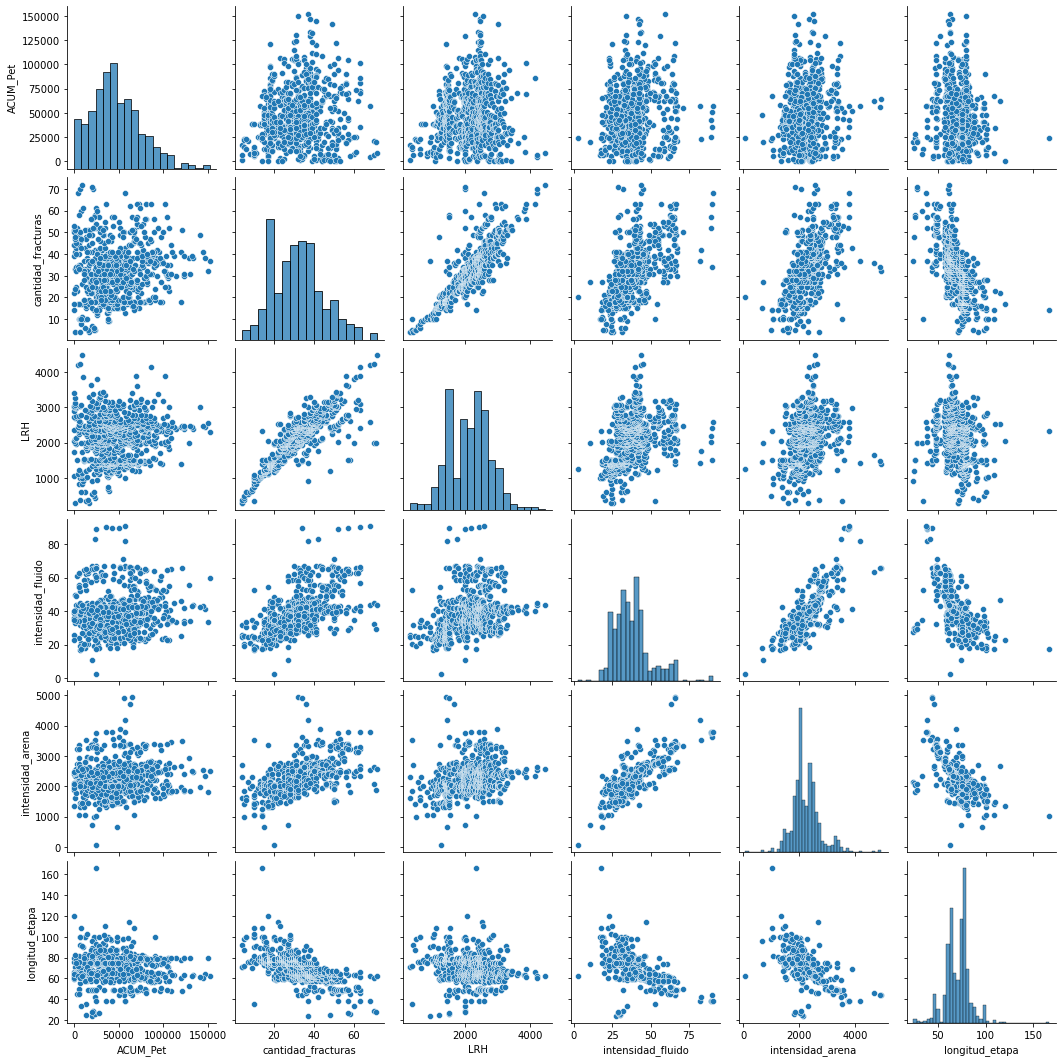

In [16]:
sns.pairplot(DS_OG, vars=["ACUM_Pet","cantidad_fracturas","LRH","intensidad_fluido","intensidad_arena","longitud_etapa"])

Se puede observar que la varaible ACUM_Pet no muestra una correlacion clara con ninguna pero si podemos observar correlaciones claras entre algunas de las otras variables como por ejemplo: Se observan correlaciones positivas entre cantidad_fracturas y LRH, intensidad_fluido e intensidad_arena; y correlaciones negativas entre entensidad_arena y longitud_etapa, intensidad_fluido y longitud_etapa, cantidad_fracturas y longitud_etapa. Solo para amplicar un poco mas nuestro analisis grafiquemos ahora algunas de las otras variables que no tienen que ver en si con las fracturas sino con la producción en si.

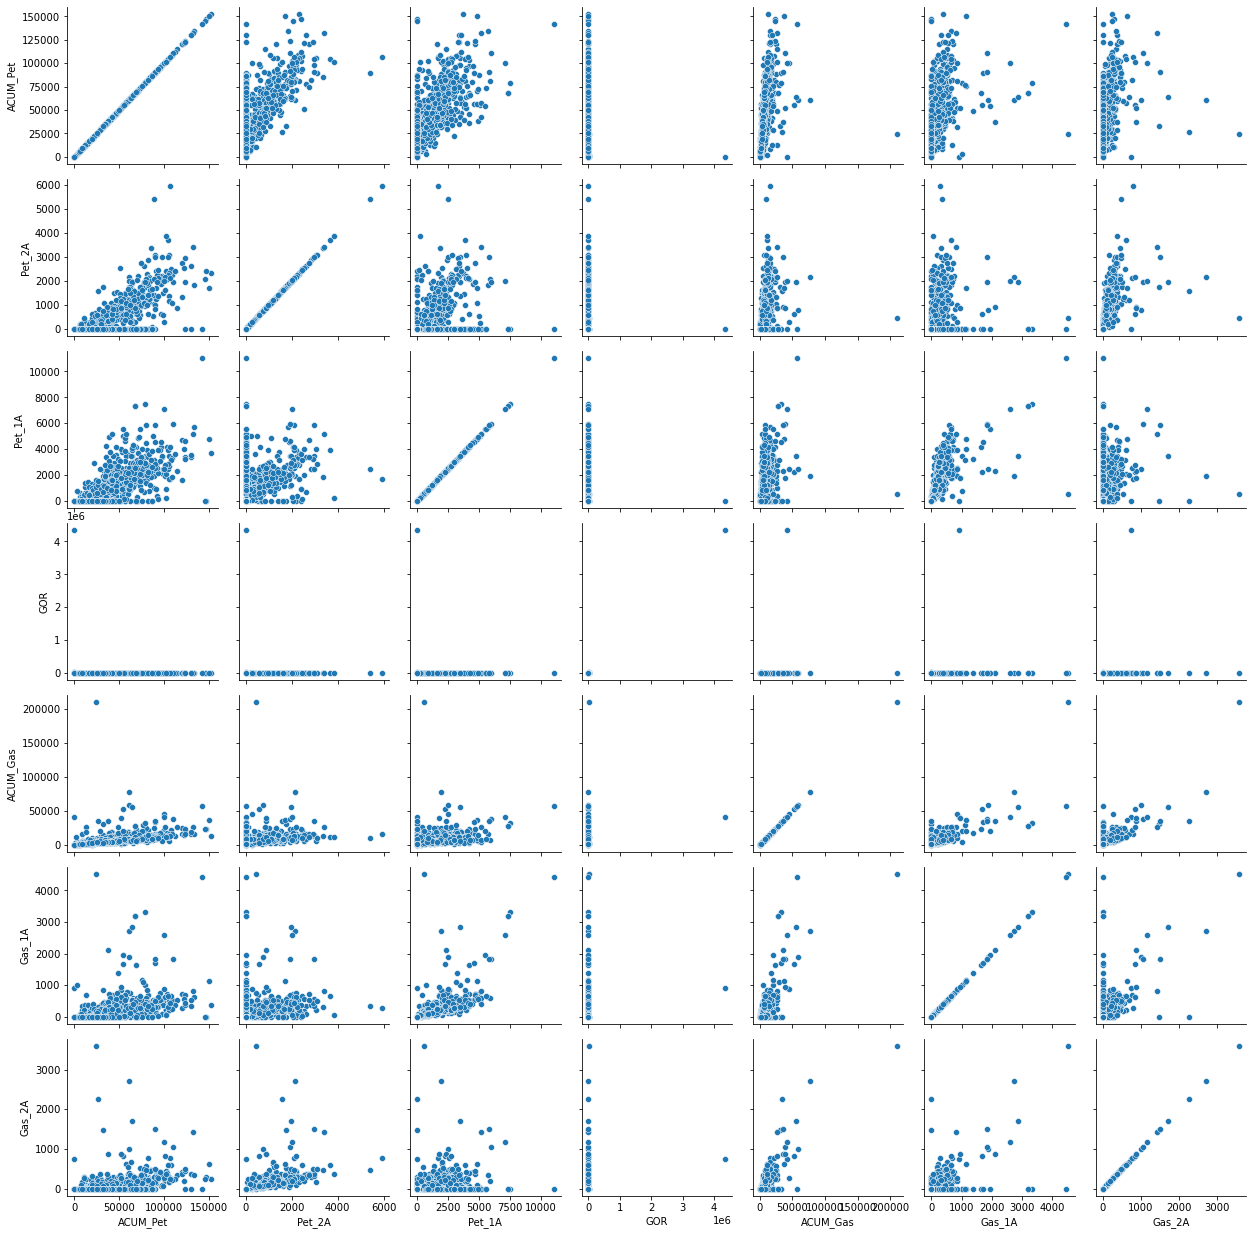

In [17]:
g = sns.PairGrid(DS_OG, vars=["ACUM_Pet","Pet_2A","Pet_1A","GOR","ACUM_Gas","Gas_1A","Gas_2A"])
g.map(sns.scatterplot)

A simple vista se puede observar que la variable GOR presenta outliers. Analicemos un poco mas dicha variable.

Text(0.5, 1.0, 'GOR')

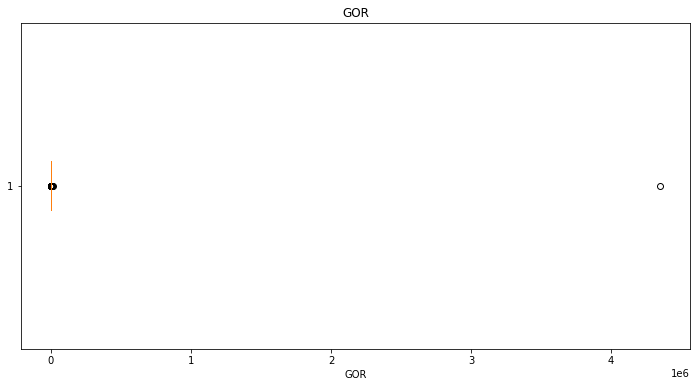

In [18]:
fig, ax = plt.subplots(figsize=(12, 6))  
ax.boxplot(DS_OG['GOR'], vert=False)
ax.set_xlabel('GOR')
ax.set_title('GOR')

El boxplot nos muestra claramente estos valores fuera de rango. Hagamos un ensayo eliminando todos los valores mayores de 10000 ya que en este tipo de yacimientos no deberia existir un GOR tan alto.

In [19]:
DS_OG.drop(DS_OG[DS_OG['GOR']>=10000].index, inplace=True)
DS_OG.shape

(742, 44)

Text(0.5, 1.0, 'GOR')

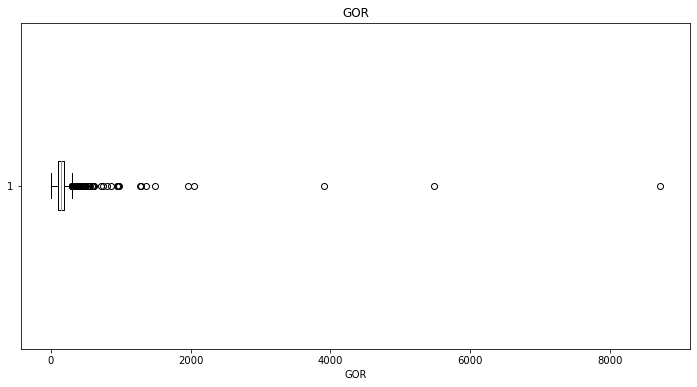

In [20]:
fig, ax = plt.subplots(figsize=(12, 6))  
ax.boxplot(DS_OG['GOR'], vert=False)
ax.set_xlabel('GOR')
ax.set_title('GOR')

Aun se observan valores totalmente fuera de rango por encima de los 2000, procedamos a eliminarlos y volvamos a realizar el PairGrid para las mismas variables que realizamos antes.

In [21]:
DS_OG.drop(DS_OG[DS_OG['GOR']>=2000].index, inplace=True)
DS_OG.shape

(738, 44)

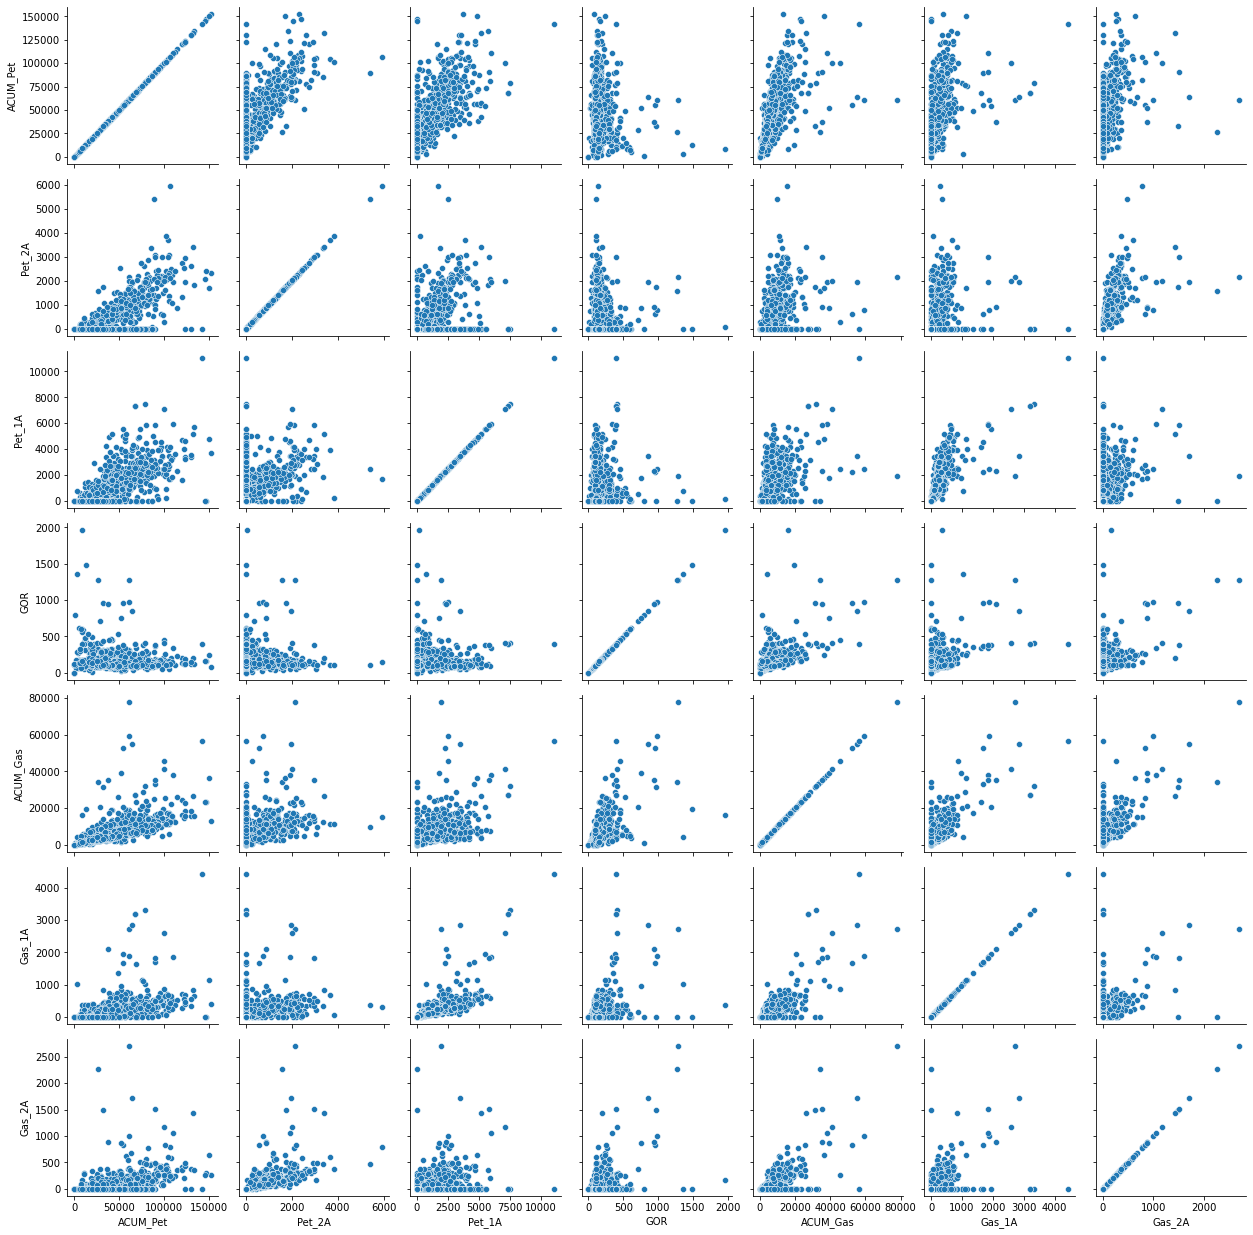

In [22]:
g = sns.PairGrid(DS_OG, vars=["ACUM_Pet","Pet_2A","Pet_1A","GOR","ACUM_Gas","Gas_1A","Gas_2A"])
g.map(sns.scatterplot)

Ahora si ya observamos que esta variable GOR esta en un rango mas razonable. Sin embargo estos gráficos no nos ayudan mucho en cuanto a mostrarnos correlaciones claras entre las variables, por lo tanto vamos a proceder a realizar un heatmap. Usaremos solo las variables numericas, por lo tanto vamos a crear un nuevo Dataset en base a esas variables.

In [23]:
DS_OGnum=DS_OG.select_dtypes(include=['float64', 'int64'])
DS_OGnum.columns

Index(['id_base_fractura_adjiv', 'idpozo', 'LRH', 'cantidad_fracturas',
       'arena_bombeada_nacional_tn', 'arena_bombeada_importada_tn',
       'agua_inyectada_m3', 'co2_inyectado_m3', 'presion_maxima_psi',
       'potencia_equipos_fractura_hp', 'anio_if', 'mes_if', 'anio_ff',
       'mes_ff', 'anio_carga', 'mes_carga', 'mes', 'anio', 'GOR', 'Pet_1A',
       'Gas_1A', 'Pet_2A', 'Gas_2A', 'ACUM_Pet', 'ACUM_Gas', 'LRH_BINS',
       'longitud_etapa', 'intensidad_fluido', 'intensidad_arena'],
      dtype='object')

In [24]:
DS_OGnum.drop(['id_base_fractura_adjiv', 'idpozo',
       'arena_bombeada_nacional_tn', 'arena_bombeada_importada_tn',
       'agua_inyectada_m3', 'co2_inyectado_m3', 'presion_maxima_psi',
       'potencia_equipos_fractura_hp', 'anio_if', 'mes_if', 'anio_ff',
       'mes_ff', 'anio_carga', 'mes_carga', 'mes', 'anio', 'LRH_BINS'], axis=1, inplace=True)
DS_OGnum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 738 entries, 2029 to 3202
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LRH                 738 non-null    float64
 1   cantidad_fracturas  738 non-null    int64  
 2   GOR                 738 non-null    float64
 3   Pet_1A              738 non-null    float64
 4   Gas_1A              738 non-null    float64
 5   Pet_2A              738 non-null    float64
 6   Gas_2A              738 non-null    float64
 7   ACUM_Pet            738 non-null    float64
 8   ACUM_Gas            738 non-null    float64
 9   longitud_etapa      738 non-null    float64
 10  intensidad_fluido   738 non-null    float64
 11  intensidad_arena    738 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 75.0 KB


<AxesSubplot:>

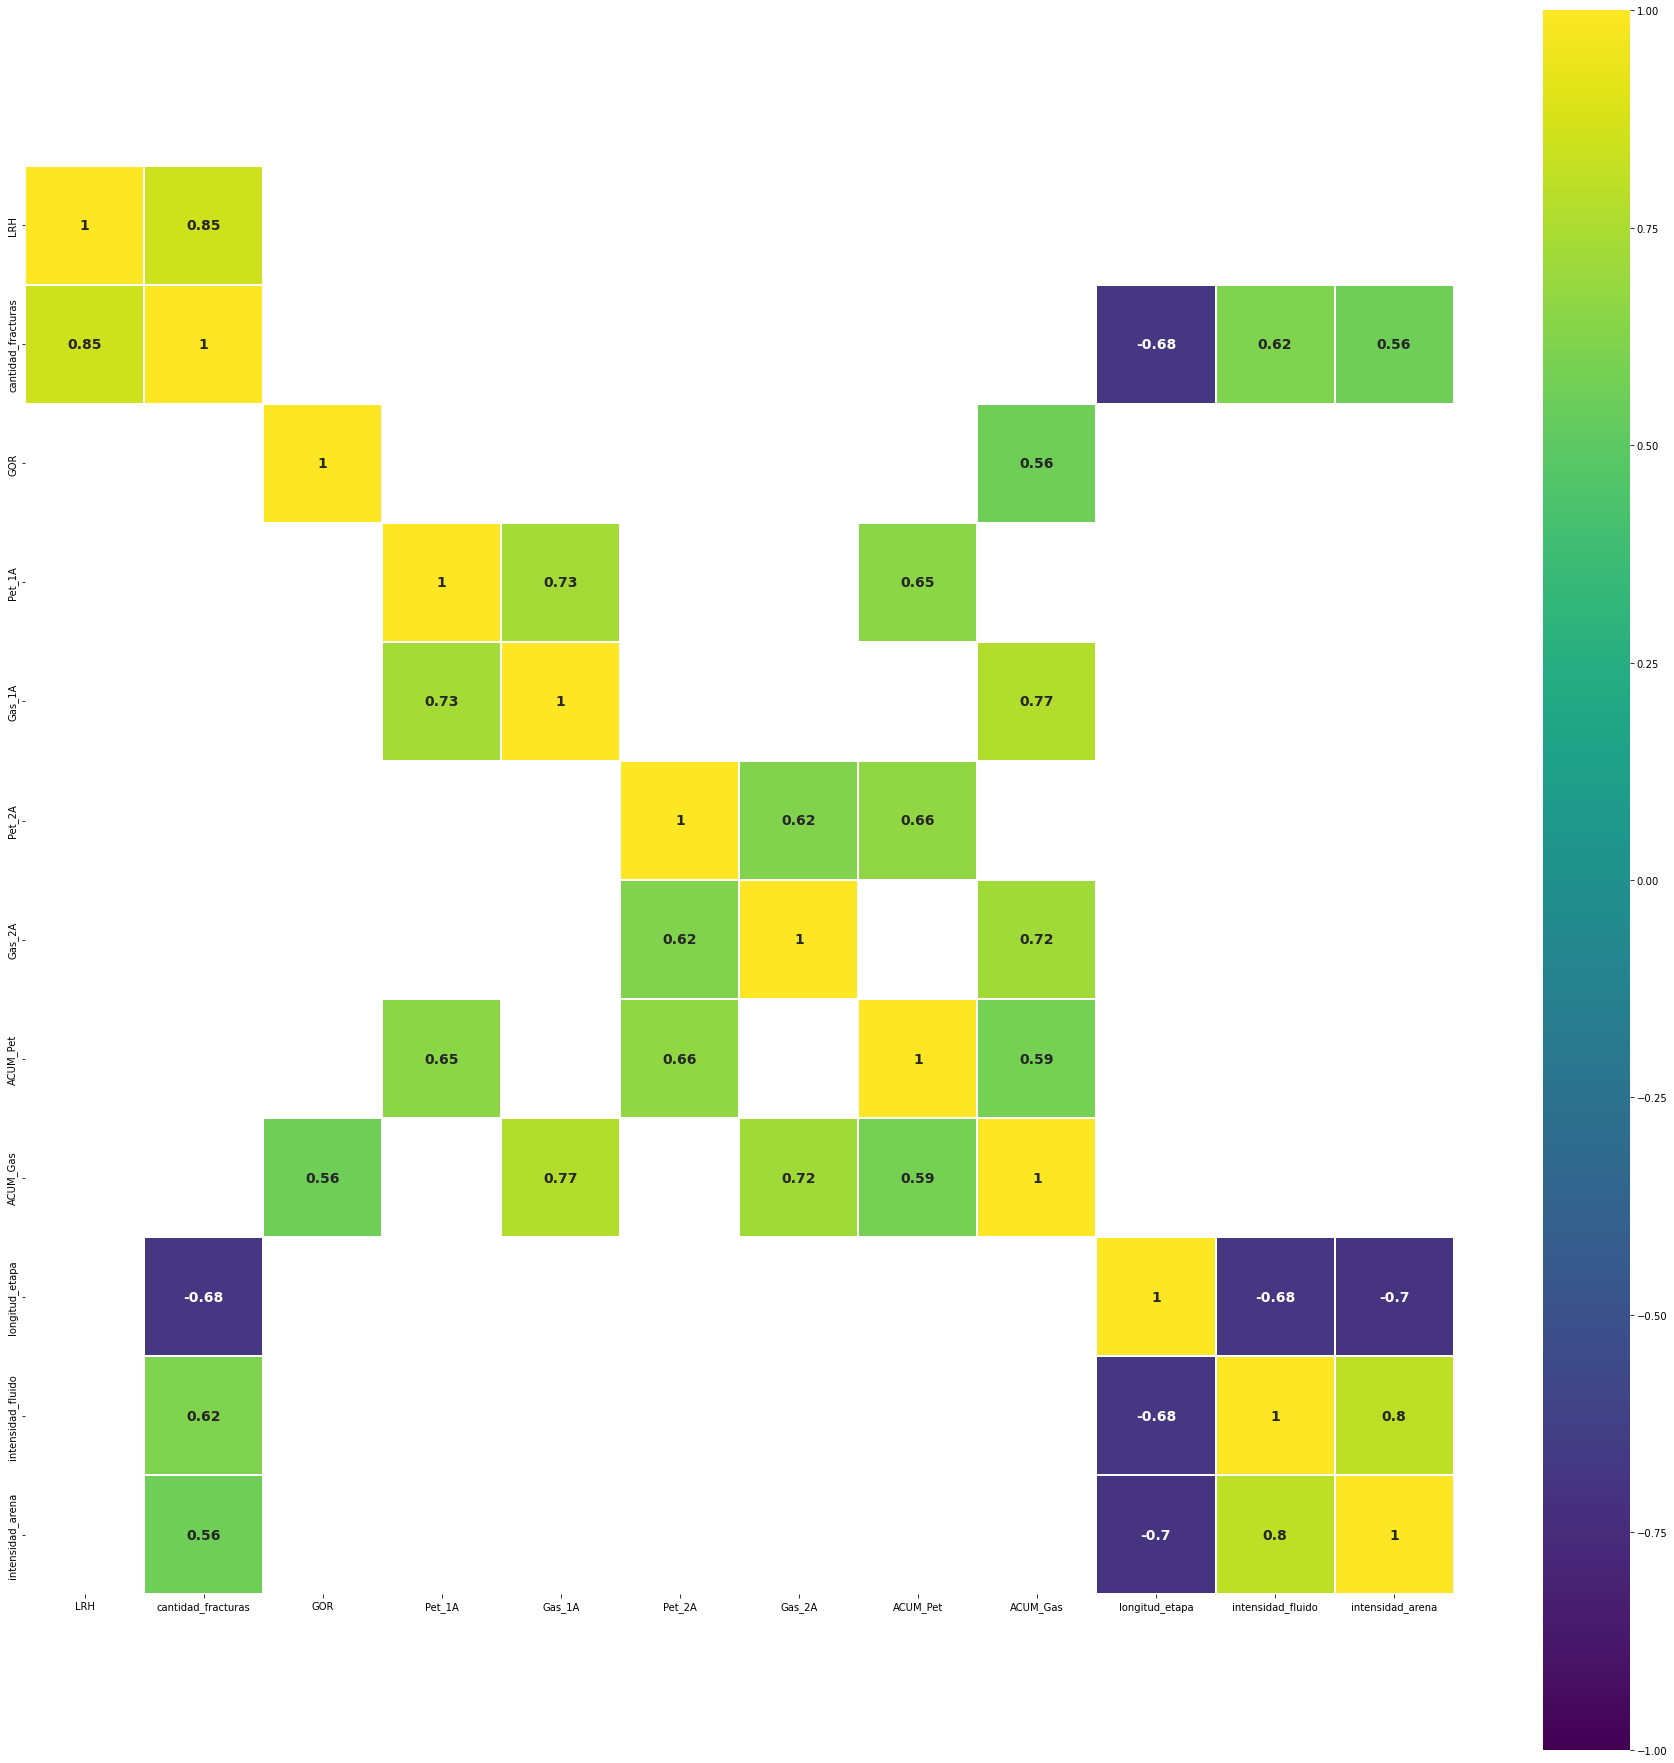

In [25]:
corre=DS_OGnum.corr()
plt.figure(figsize=(32,32))
sns.heatmap(corre[(corre >= 0.5) | (corre <= -0.5)], cmap='viridis', vmax=1.0, vmin=-1.0,linewidths=0.1, annot=True, annot_kws={"size":14,"weight":'demibold'}, square=True)

Aca podemos observar que las variables de producción (las de los fluidos) se correlacionan entre si, y las de las fracturas tambien se correlacionan entre si, pero no existe mayor correlacion a simple vista entre fluidos y fracturas. Vamos a crear entonces un Clustermap, con el cual identificaremos que variables podriamos agrupar o relacionar para lograr establecer la una correlacion que nos ayude en la resolución de nuestra hipotesis.

<Figure size 864x864 with 0 Axes>

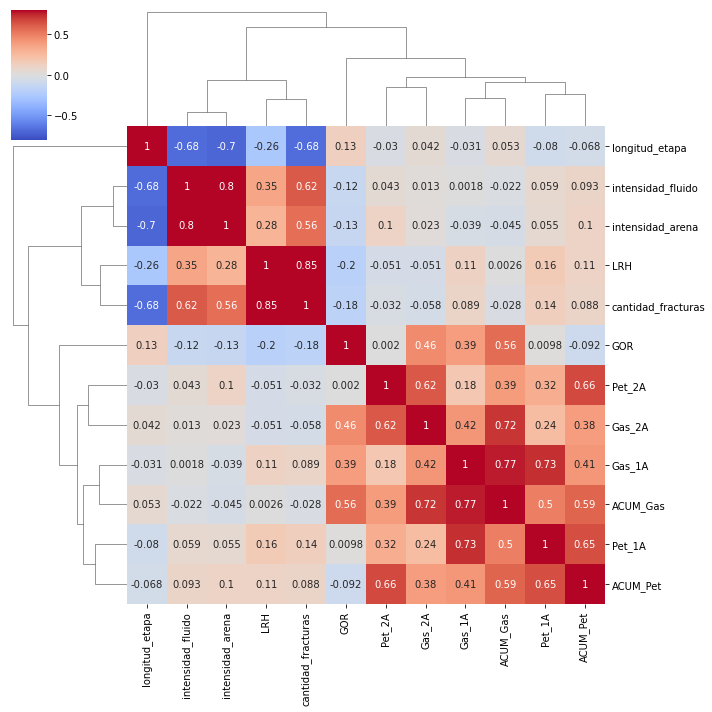

In [26]:
plt.figure(figsize=(12,12))
sns.clustermap(corre,vmin=-0.8,vmax=0.8,annot=True, cmap="coolwarm")

A partir de este grafico podemos obseravar que si logro agrupar algunas variables que definen a las fracturas se podria establecer una mejor correlación con la acumulada de petroleo (ACUM_Pet). Pero claro este seria un analisis mas profundo que podriamos hacer mas adelante.  

Para finalizar, como no he usado la variable del tiempo (anio) voy a realizar unos graficos segmentando por los años de producción. Antes vamos a calcular con cuales variables referente a las fracturas se observa alguna correlación.

In [27]:
Corr_PET=DS_OGnum.corr()['ACUM_Pet'][:-1]
Corr_PET_List=Corr_PET[abs(Corr_PET)> 0.1].sort_values(ascending=False)
print("Hay {} variables con mas de 10% de correlación con ACUM_Pet:\n{}".format(len(Corr_PET_List),Corr_PET_List))

Hay 7 variables con mas de 10% de correlación con ACUM_Pet:
ACUM_Pet    1.000000
Pet_2A      0.664153
Pet_1A      0.653904
ACUM_Gas    0.585665
Gas_1A      0.411928
Gas_2A      0.384720
LRH         0.106014
Name: ACUM_Pet, dtype: float64


La variable LRH es la unica variable de los datos de fractura con la cual encontramos alguna correlacion con la acumulada de petroleo. Procedamos entonces a graficar la misma.

<AxesSubplot:xlabel='LRH', ylabel='ACUM_Pet'>

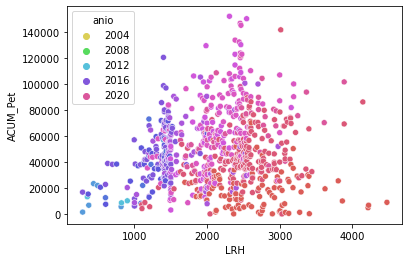

In [28]:
sns.scatterplot(data=DS_OG,x="LRH",y="ACUM_Pet", hue="anio", palette="hls")

Como es un poco dificil en este grafico diferenciar los pozos por año, vamos a hacer un agrupamiento por año, convirtiendo los años en categorias discretas. Agruparemos todos los pozos que se hiceron a partir del 2012, que como vimos en los gráficos que realizamos en la segunda entrega fue el año cuando se comenzó el desarrollo intensivo del proyecto.

In [29]:
DS_OG['bin_anio'] = pd.cut(DS_OG['anio'], bins=[2012,2014,2016,2018,2020,2022])

<AxesSubplot:xlabel='LRH', ylabel='ACUM_Pet'>

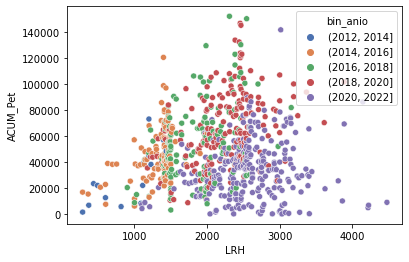

In [30]:
sns.scatterplot(data=DS_OG,x="LRH",y="ACUM_Pet", hue="bin_anio", palette="deep")

Se puede observar que los pozos que tienen mayor tiempo por supuesto son los que tiene mayor acumulada, por lo tanto para poder comparar los datos a la misma condicion de tiempo, analicemos usando ahora la acumulada a un solo año, de esta manera podremos observar bien la correlacion entre las variables basados en un mismo periodo de tiempo.

In [31]:
Corr_PET_1A=DS_OGnum.corr()['Pet_1A'][:-1]
Corr_PET_List_1A=Corr_PET_1A[abs(Corr_PET_1A)> 0.1].sort_values(ascending=False)
print("Hay {} variables con correlación mayor a un 10% con Pet_1A:\n{}".format(len(Corr_PET_List_1A),Corr_PET_List_1A))

Hay 8 variables con correlación mayor a un 10% con Pet_1A:
Pet_1A                1.000000
Gas_1A                0.730575
ACUM_Pet              0.653904
ACUM_Gas              0.499726
Pet_2A                0.316947
Gas_2A                0.238572
LRH                   0.159313
cantidad_fracturas    0.137447
Name: Pet_1A, dtype: float64


Aunque mejoro un poco la correlación, igualemente LRH sigue siendo la variable que mejor correlaciona con la acumulada de petroleo. Asi que corroboramos   lo que habiamos mencionado anteriormente con el clustermap, tendriamos que crear unas varibles nuevas que correlacionen las varibles de produción (las referentes a los fluios) con las variables de fracrtura.Por los momentos dejaremos el analisis hasta este punto para luego ahondarnos mas siguiendo estas directrices que hemos encontrado hasta este punto.